# K Nearest Neighbors

- **Purpose:** Understand KNN by applying it to one example
- **Data:** Mushrooms classification. For more info follow <a href="http://archive.ics.uci.edu/ml/datasets/Mushroom" target="_blank">this link</a> 
- **Author:** Emily Diaz
- **Date:** November 3rd of 2020 

Useful links (used as reference for this notebook): 
- https://towardsdatascience.com/a-simple-introduction-to-k-nearest-neighbors-algorithm-b3519ed98e
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- https://hackerbits.com/data/k-nearest-neighbor-knn-data-mining-algorithm/#:~:text=kNN%2C%20or%20k%2DNearest%20Neighbors,because%20it's%20a%20lazy%20learner.

## K Nearest Neighbors (KNN)

K Nearest Neighbors (KNN) is a Machine Learning technique for **classification** and **regression** problems that stores all the available cases and classifies the new data or case based on a similarity measure. When new unlabeled data comes in, kNN operates in 2 basic steps:
1. It looks at the k closest labeled training data points (near neighbors)
2. Using the neighbors’ values for the target variable, kNN gets a better idea of how the new data should be predicted.


The default metrics to calculate similarity between observations is Euclidean distance. The K is one of the most relevant parameters of the model, it determines how many neighbors is going to consider for the predictions. There is no structured method to find the best value for “K”. We need to find out with various values by trial and error.

<img src="img/KNN.jpg" alt="Drawing" style="width: 400px;"/>


**Some common use cases for KNN:**
- Recommender systems
- Image classification


**Pros:**
- Ease of understanding and implementing
- There’s no need to build a model, tune several parameters, or make additional assumptions
- Naturally handles multi-class cases
- Can do well in practice with enough representative data

**Cons:**
- kNN can get very computationally expensive when trying to determine the nearest neighbors on a large dataset
- Need to determine the value of parameter K (number of nearest neighbors)
- The algorithm gets significantly slower as the number of examples and/or predictors/independent variables increase


<img src="img/knn_meme.jpeg"/>


This notebook is divided into the following sections/steps:
1. [Libraries](#libraries)
2. [Load data](#loaddata)
3. [Data Exploration](#exploration)
4. [Data Preparation](#dataprep)
5. [Model - KNN](#knn)

<a id="libraries"></a>
# 1. Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler # scaling data to 0-1 range
from sklearn.model_selection import train_test_split #train/test split
import matplotlib.pyplot as plt # plot
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV # Parameter tuning
#from sklearn.pipeline import Pipeline # To create model pipelines
from sklearn.neighbors import KNeighborsClassifier # KNN for regression
from sklearn.preprocessing import LabelEncoder # Encoder
#from sklearn.inspection import permutation_importance # feature importance
import shap
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix # accuracy metrics

import warnings
warnings.filterwarnings('ignore') # to hide all warnings

/Users/natashadiaz/opt/anaconda3/envs/ml_models/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Functions

In [3]:
# To regroup categories with low freq
def condense_category(col, min_freq=0.01, new_name='other'):
    series = pd.value_counts(col)
    mask = (series/series.sum()).lt(min_freq)
    return pd.Series(np.where(col.isin(series[mask].index), new_name, col))

<a id="loaddata"></a>
# 2. Load Data

In [3]:
col_names = ['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 
        'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 
         'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 
        'ring_type', 'spore_print_color', 'population', 'habitat']

df = pd.read_csv('./1_Input/agaricus-lepiota.data', names=col_names)
df = df.reset_index()
df = df.rename(columns={'index':'class'})
print(df.shape)
df.head()


(8124, 23)


,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<a id="exploration"></a>
# 3. EDA

In [4]:
df.head()

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<img src="img/mushroom.gif" alt="Drawing" style="width: 400px;"/>

stalk = stem

<a id="dataprep"></a>
# 4. Data Prep

In [40]:
df.cap_shape.value_counts()/len(df)

x        0.450025
f        0.387986
k        0.101920
other    0.060069
Name: cap_shape, dtype: float64

In [7]:
# Regroup categories
print('Original categories')
display(df.nunique())
df = df.apply(condense_category, axis=0, min_freq=0.1)
print('New categories')
display(df.nunique())

Original categories


class                        2
cap_shape                    6
cap_surface                  4
cap_color                   10
bruises                      2
odor                         9
gill_attachment              2
gill_spacing                 2
gill_size                    2
gill_color                  12
stalk_shape                  2
stalk_root                   5
stalk_surface_above_ring     4
stalk_surface_below_ring     4
stalk_color_above_ring       9
stalk_color_below_ring       9
veil_type                    1
veil_color                   4
ring_number                  3
ring_type                    5
spore_print_color            9
population                   6
habitat                      7
dtype: int64

New categories


class                       2
cap_shape                   4
cap_surface                 4
cap_color                   6
bruises                     2
odor                        3
gill_attachment             2
gill_spacing                2
gill_size                   2
gill_color                  5
stalk_shape                 2
stalk_root                  4
stalk_surface_above_ring    3
stalk_surface_below_ring    3
stalk_color_above_ring      3
stalk_color_below_ring      3
veil_type                   1
veil_color                  2
ring_number                 2
ring_type                   4
spore_print_color           5
population                  4
habitat                     5
dtype: int64

In [8]:
# Remove veil type
df = df.drop(columns='veil_type')

In [9]:
# X vs y
X = df.drop(columns='class')
y = df['class']

In [10]:
# List of vars with 2 categories
vars_multi_categories = X.nunique()
vars_multi_categories = vars_multi_categories[vars_multi_categories > 2].index
vars_multi_categories = vars_multi_categories.tolist()
vars_multi_categories

['cap_shape',
 'cap_surface',
 'cap_color',
 'odor',
 'gill_color',
 'stalk_root',
 'stalk_surface_above_ring',
 'stalk_surface_below_ring',
 'stalk_color_above_ring',
 'stalk_color_below_ring',
 'ring_type',
 'spore_print_color',
 'population',
 'habitat']

In [11]:
# Encoder - dummies
# Multiple categories
print('initial shape',str(X.shape))
X = pd.get_dummies(X, columns= vars_multi_categories)
print('second shape',str(X.shape))
# 2 categories
X = pd.get_dummies(X,drop_first=True)
print('third shape',str(X.shape))
X.head()

initial shape (8124, 21)
second shape (8124, 63)
third shape (8124, 63)


,cap_shape_f,cap_shape_k,cap_shape_other,cap_shape_x,cap_surface_f,cap_surface_other,cap_surface_s,cap_surface_y,cap_color_e,cap_color_g,...,habitat_l,habitat_other,habitat_p,bruises_t,gill_attachment_other,gill_spacing_w,gill_size_n,stalk_shape_t,veil_color_w,ring_number_other
0,0,0,0,1,0,0,1,0,0,0,...,0,1,0,1,0,0,1,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,0,1,0,0,...,0,1,0,1,0,0,1,0,1,0
4,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,1,0


In [12]:
# Encode string class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y)
y_encoded = label_encoder.transform(y)
y_encoded

array([1, 0, 0, ..., 0, 1, 0])

In [13]:
# Train and test set
seed = 123
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=test_size, random_state=seed)


# 5. Modeling

In [14]:
# Model
knn = KNeighborsClassifier() # default neighbors is 5
knn.fit(X_train, y_train)
print(knn)

KNeighborsClassifier()


Predictions

In [15]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

Performance

In [17]:
# Performance
print('Train Accuracy: ' + str(accuracy_score(knn.predict(X_train), y_train)))
print('Test Accuracy: ' + str(accuracy_score(y_pred, y_test)))


Train Accuracy: 1.0
Test Accuracy: 1.0


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       863
           1       1.00      1.00      1.00       762

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



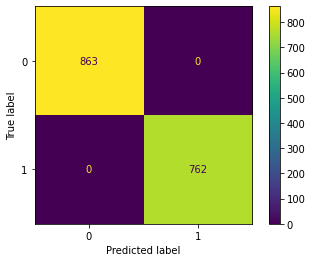

In [19]:
plot_confusion_matrix(knn, X_test, y_test)

Variable importance

In [22]:
# Produce the SHAP values
shap_sample = shap.sample(X_test, 100)

In [23]:
shap_values = shap.KernelExplainer(knn.predict, shap_sample).shap_values(shap_sample)

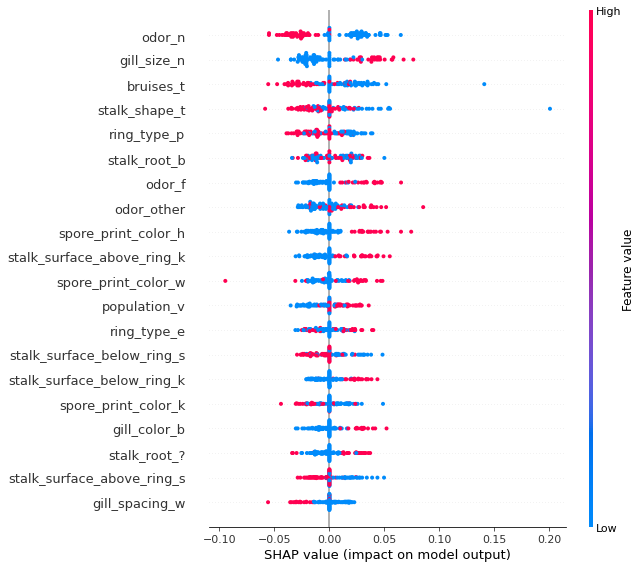

In [24]:
shap.summary_plot(shap_values, shap_sample)


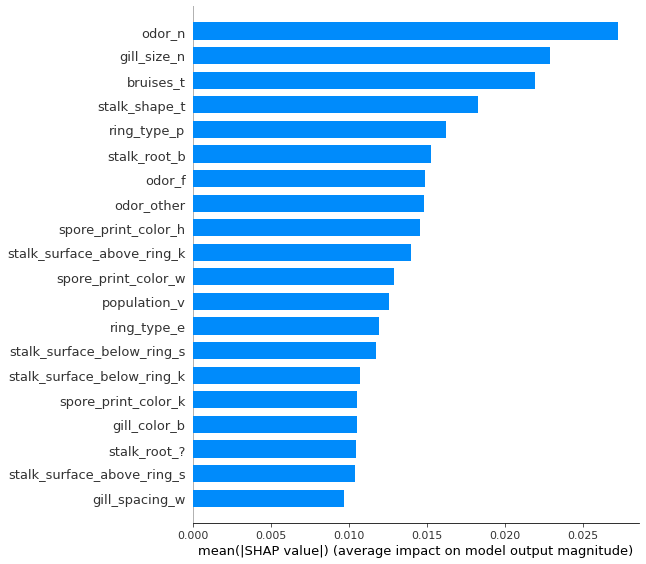

In [25]:
shap.summary_plot(shap_values, shap_sample, plot_type="bar")

### Tune

In [26]:
#List Hyperparameters that we want to tune.
n_neighbors = list(range(1,30))

#Convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=5)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])


Best n_neighbors: 3


With best number of neighbors

In [27]:
# Create KNN Object.
knn = KNeighborsClassifier(n_neighbors = 3)

# Training the model.
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [33]:
# Predict test data set.
y_pred = knn.predict(X_test)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       863
           1       1.00      1.00      1.00       762

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



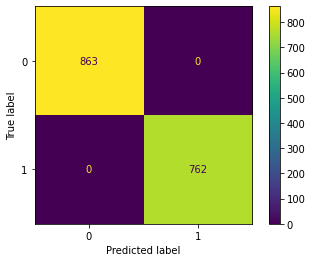

In [30]:
plot_confusion_matrix(knn, X_test, y_test)